# import library

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
cmap = plt.get_cmap('Spectral') #mengimpor warna gradasi
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


# data kejahatan di london 2008 - 2016

## persiapan

In [2]:
df_crime_london=pd.read_csv('london_crime_by_lsoa.csv') #import data
df_crime_london.shape #mengetahui banyaknya baris dan kolom yang diperoleh

(13490604, 7)

In [3]:
df_crime_london.describe(include='O').transpose() #mengetahui banyaknya data yang unik dan frekuensinya

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180


In [4]:
df_crime_london.describe(exclude='O').transpose() #mengetahui deskripsi data secara singkat

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


In [5]:
df_crime_london.isnull().any() #mengetahui apakah ada data yang kosong dan ternyata tidak ada data yang kosong

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [6]:
df_crime_london.info() #mengetahui value dari masing-masing kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
#berdasarkan dari data yang kosong dan value dari kolom maka data yang ada sudah benar dan dapat langsung digunakan
df_crime_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


# total kejahatan per tahun pada 2008 -2016

## periapan

In [8]:
#mengekstrak data yang diperlukan yaitu data kejahatan 'value' tiap tahunnya
tahun = df_crime_london['year'].unique()
total_pertahun = df_crime_london.groupby('year').sum()
total=total_pertahun['value'].to_numpy()

n = len(tahun)
for i in range(n):
    for j in range (0, n-i-1):
        if tahun[j]>tahun[j+1]:
            tahun[j], tahun[j+1] = tahun[j+1], tahun[j]
            total[j], total[j+1] = total[j+1], total[j]

print(tahun)
print(total)

[2008 2009 2010 2011 2012 2013 2014 2015 2016]
[715324 736121 737329 711624 724915 686407 680183 717214 738641]


## infografis

In [9]:
df_pertahun = pd.DataFrame({'Tahun':tahun, 'Total':total})
df_pertahun.set_index('Tahun', inplace=True)

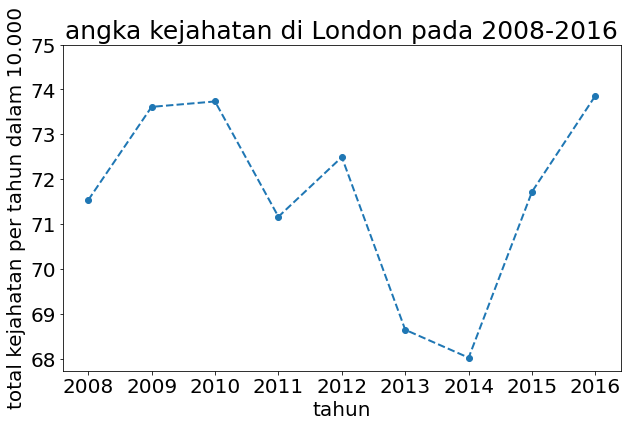

In [10]:
df_pertahun.plot(marker='o', ls='--', lw=2, legend=None, figsize=(10,6))
plt.xlabel('tahun', size=20)
plt.ylabel('total kejahatan per tahun dalam 10.000', size=20)
plt.title('angka kejahatan di London pada 2008-2016', size=25)
plt.xticks(size=20)
values=np.arange(68, 76 , 1)
values_incerment=10000
plt.yticks(values*values_incerment,['%d' %val for val in values], size=20)
plt.show()


### kesimpulan
- dari gambar dapat diketahui terjadi peningkatan kejahatan yang sangat drastis pada tahun 2014 hingga 2016. Hal ini menimbulkan beberapa pertanyaan sebagai berikut:
   -  kategori kejahatan apa yang menominasi kategori kejahatan?
    - daerah mana yang mengalami kejatan paling besar pada tahun tersebut?
 

# kategori kejahatan berat pada tahun 2014 - 2016

## preparasi

In [11]:
df_crime_london.set_index('year', inplace=True)

In [12]:
df_14=df_crime_london.loc[[2014]]
df_15=df_crime_london.loc[[2015]]
df_16=df_crime_london.loc[[2016]]

In [13]:
# kategori berat 2014
kategori= df_14['major_category'].unique()
total_kategori14 = df_14.groupby('major_category').sum()
total_kat_14=total_kategori14['value'].to_numpy()

n = len(kategori)
for i in range(n):
    for j in range (0, n-i-1):
        if kategori[j]>kategori[j+1]:
            kategori[j], kategori[j+1] = kategori[j+1], kategori[j]
            total_kat_14[j], total_kat_14[j+1] =total_kat_14[j+1], total_kat_14[j]

print(kategori)
print(total_kat_14)

['Burglary' 'Criminal Damage' 'Drugs' 'Fraud or Forgery'
 'Other Notifiable Offences' 'Robbery' 'Sexual Offences'
 'Theft and Handling' 'Violence Against the Person']
[     0  13037      0 185349  22150  76053 279880  59279  44435]


In [14]:
# kategori berat 2015
kategori= df_15['major_category'].unique()
total_kategori15 = df_15.groupby('major_category').sum()
total_kat_15=total_kategori15['value'].to_numpy()

n = len(kategori)
for i in range(n):
    for j in range (0, n-i-1):
        if kategori[j]>kategori[j+1]:
            kategori[j], kategori[j+1] = kategori[j+1], kategori[j]
            total_kat_15[j], total_kat_15[j+1] =total_kat_15[j+1], total_kat_15[j]

print(kategori)
print(total_kat_15)

['Burglary' 'Criminal Damage' 'Drugs' 'Fraud or Forgery'
 'Other Notifiable Offences' 'Robbery' 'Sexual Offences'
 'Theft and Handling' 'Violence Against the Person']
[284022  62976  39785      0  14229  21383 218740      0  70489]


In [15]:
# kategori berat 2016
kategori= df_16['major_category'].unique()
total_kategori16 = df_16.groupby('major_category').sum()
total_kat_16=total_kategori16['value'].to_numpy()

n = len(kategori)
for i in range(n):
    for j in range (0, n-i-1):
        if kategori[j]>kategori[j+1]:
            kategori[j], kategori[j+1] = kategori[j+1], kategori[j]
            total_kat_16[j], total_kat_16[j+1] =total_kat_16[j+1], total_kat_16[j]

print(kategori)
print(total_kat_16)

['Burglary' 'Criminal Damage' 'Drugs' 'Fraud or Forgery'
 'Other Notifiable Offences' 'Robbery' 'Sexual Offences'
 'Theft and Handling' 'Violence Against the Person']
[ 68285      0 294133 232381      0  15809  22528  38914  64071]


In [16]:
df_kat_berat=pd.DataFrame({'Kategori': kategori, '2014': total_kat_14, '2015': total_kat_15, '2016': total_kat_16})
df_kat_berat['Total'] = df_kat_berat.sum(axis=1)
df_kat_berat.set_index('Kategori',inplace=True)
df_kat_berat

/tmp/ipykernel_283/2405804479.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_kat_berat['Total'] = df_kat_berat.sum(axis=1)


,2014,2015,2016,Total
Kategori,,,,
Burglary,0,284022,68285,352307
Criminal Damage,13037,62976,0,76013
Drugs,0,39785,294133,333918
Fraud or Forgery,185349,0,232381,417730
Other Notifiable Offences,22150,14229,0,36379
Robbery,76053,21383,15809,113245
Sexual Offences,279880,218740,22528,521148
Theft and Handling,59279,0,38914,98193
Violence Against the Person,44435,70489,64071,178995


## infografis

Text(0.5, 0, 'kategori kejahatan berat')

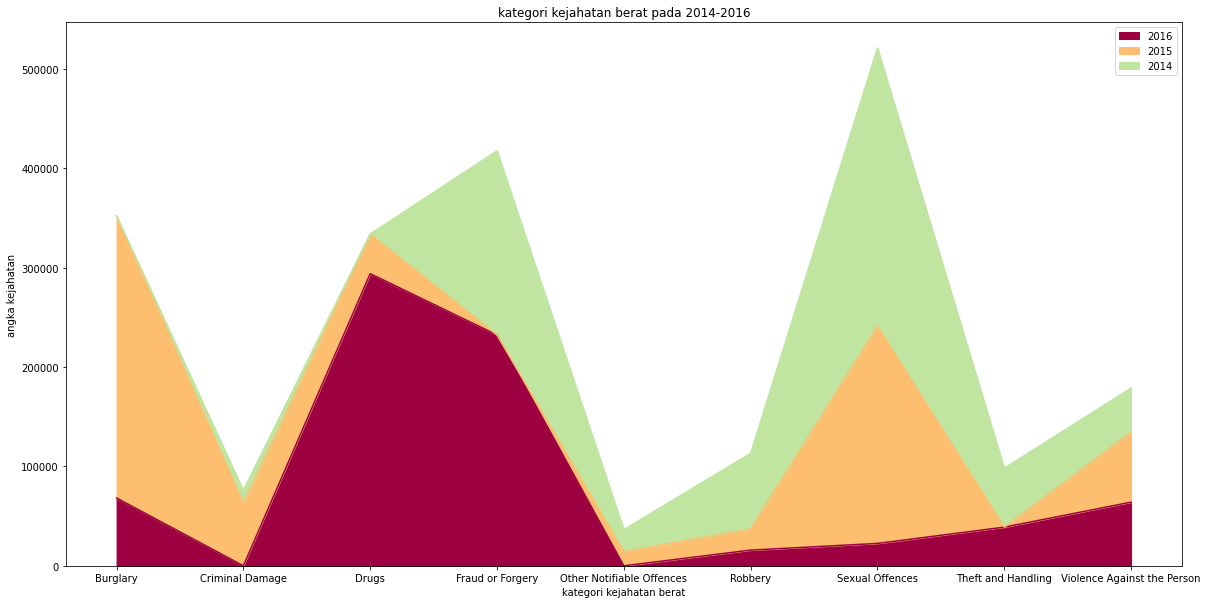

In [17]:
color1= [cmap(i) for i in np.linspace(0, 1, 4)]
ax = df_kat_berat[{'2014','2015','2016'}].plot(kind='area', stacked=True, figsize=(20, 10), color=color1)
ax.set_title('kategori kejahatan berat pada 2014-2016')
ax.set_ylabel('angka kejahatan')
ax.set_xlabel('kategori kejahatan berat')

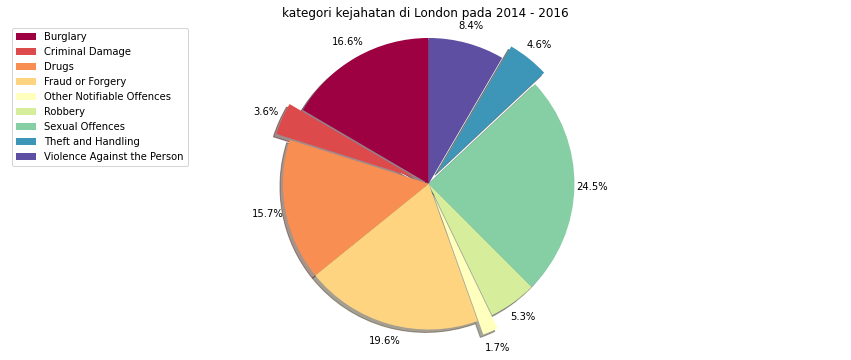

In [18]:
color1= [cmap(i) for i in np.linspace(0, 1, 9)]
explode_list=[0, 0.1, 0, 0, 0.1, 0, 0, 0.1, 0] 
df_kat_berat['Total'].plot(kind='pie',
                                         figsize=(15,6),
                                         autopct='%1.1f%%',
                                         startangle=90, 
                                         shadow=True,
                                         pctdistance=1.12,
                                         labels=None,
                                         colors=color1,
                                         explode=explode_list)
plt.legend(labels=df_kat_berat.index, loc='upper left')
plt.title('kategori kejahatan di London pada 2014 - 2016')
plt.axis('equal')
plt.ylabel(None)
plt.show()

### kesimpulan
- Setiap kategori kejahatan tidak selalu terjadi pada setiap tahunnya. Hal ini perlu dianalisis lebih lanjut, apa yang menyebabkan kategori tersebut tidak terjadi pada tahun tersebut
- ketegori kejahatan di dominasi oleh sexual offences, fraud or forgery, burglary, drugs

# angka kejahatan pada setiap daerah

## preparasi

In [19]:
df_14.head()

,lsoa_code,borough,major_category,minor_category,value,month
year,,,,,,
2014,E01003852,Richmond upon Thames,Robbery,Personal Property,0,1
2014,E01001193,Croydon,Theft and Handling,Other Theft,1,5
2014,E01000280,Barnet,Theft and Handling,Theft/Taking Of Motor Vehicle,0,3
2014,E01000510,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,9
2014,E01000808,Bromley,Robbery,Personal Property,0,6


In [20]:
# total 2014
daerah= df_14['borough'].unique()
angka14 = df_14.groupby('borough').sum()
total_angka14=angka14['value'].to_numpy()

n = len(daerah)
for i in range(n):
    for j in range (0, n-i-1):
        if daerah[j]>daerah[j+1]:
            daerah[j], daerah[j+1] = daerah[j+1], daerah[j]
            total_angka14[j],total_angka14[j+1] =total_angka14[j+1], total_angka14[j]

print(daerah)
print(total_angka14)

['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
[24893 11844 20271 24426 19668 31765 21364 22572 24978 20005 19590 14734
 27198 10456 10443 28912 22773 11596 19185 24679 11909 17840   115 21101
 19894  9288 15426 21700 25504 47564 28005 23128 27357]


In [21]:
# total 2015
daerah= df_15['borough'].unique()
angka15 = df_15.groupby('borough').sum()
total_angka15=angka15['value'].to_numpy()

n = len(daerah)
for i in range(n):
    for j in range (0, n-i-1):
        if daerah[j]>daerah[j+1]:
            daerah[j], daerah[j+1] = daerah[j+1], daerah[j]
            total_angka15[j],total_angka15[j+1] =total_angka15[j+1], total_angka15[j]

print(daerah)
print(total_angka15)

['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
[30260 26941 21286 26247 16346 22401 47395 24626 28089 33164  9738 18897
 12273 11990 22076 29477 10598 24883 23437 19848 29217 24036 27493 20969
 20929 23234 27032 20637 15870 19070   151 10413 12601]


In [22]:
# total 2016
daerah= df_16['borough'].unique()
angka16 = df_16.groupby('borough').sum()
total_angka16=angka16['value'].to_numpy()

n = len(daerah)
for i in range(n):
    for j in range (0, n-i-1):
        if daerah[j]>daerah[j+1]:
            daerah[j], daerah[j+1] = daerah[j+1], daerah[j]
            total_angka16[j],total_angka16[j+1] =total_angka16[j+1], total_angka16[j]

print(daerah)
print(total_angka16)

['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
[20716 19502 19580 30090 28712 23679 48330 16741 23904 31636 24684 20174
  9983 27127 12755 13153 20164 29253 28265 24341 29183 16903   178 10658
 27174 12840 11074 22485 26693 27092 22730 34071 22251]


In [23]:
df_kej_daerah=pd.DataFrame({'Daerah': daerah, '2014': total_angka14, '2015': total_angka15, '2016': total_angka16})
df_kej_daerah['Total'] = df_kej_daerah.sum(axis=1)
df_kej_daerah

/tmp/ipykernel_283/3103750840.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_kej_daerah['Total'] = df_kej_daerah.sum(axis=1)


,Daerah,2014,2015,2016,Total
0,Barking and Dagenham,24893,30260,20716,75869
1,Barnet,11844,26941,19502,58287
2,Bexley,20271,21286,19580,61137
3,Brent,24426,26247,30090,80763
4,Bromley,19668,16346,28712,64726
5,Camden,31765,22401,23679,77845
6,City of London,21364,47395,48330,117089
7,Croydon,22572,24626,16741,63939
8,Ealing,24978,28089,23904,76971
9,Enfield,20005,33164,31636,84805


In [24]:
df_kej_daerah_tnp_total=df_kej_daerah.drop('Total', axis=1)
df_kej_daerah_tnp_total.set_index('Daerah', inplace=True)

## infografis

In [25]:
world_geo = r'london_boroughs.json'
world_map = folium.Map(location=[51.5074, 0.1278], zoom_start=9, tile='Mapbox Bright')

In [26]:
world_map.choropleth(
    geo_data=world_geo,
    data=df_kej_daerah,
    columns=['Daerah', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Kejahatan di London')

/home/jefl5/.local/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [27]:
world_map.save('LondonCrime.html')
display(world_map)

In [ ]:
london_folium=np.array(Image.open(''))

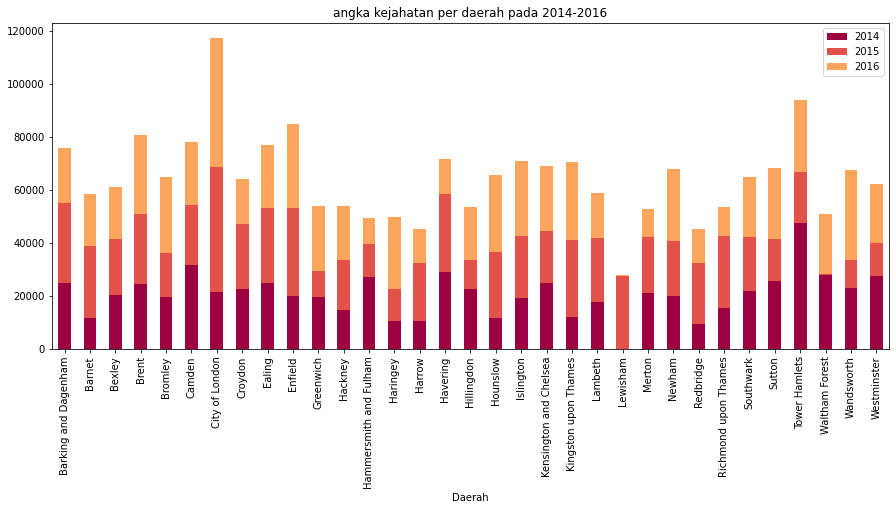

In [28]:
color1= [cmap(i) for i in np.linspace(0, 1, 8)]
df_kej_daerah_tnp_total.plot(kind='bar',
                                         figsize=(15,6),
                                         stacked=True,
                                         color=color1)
plt.title('angka kejahatan per daerah pada 2014-2016')
plt.show()

### kesimpulan
- ternyata tiap daerah mengalami peningkatan kejahatan yang berbeda-beda, kejahatan paling tinggi terjadi pada daerah City of London. Hal ini menimbulkan beberapa pertanyaan:
    - apakah yang menyebabkan kejahatan di daerah City of London mengalami peningkatan tertinggi?
    - apakah jumlah police code (kantor polisi) mempengaruhi angka kejahatan?

# hubungan jumlah kantor polisi pada setiap daerah dengan angka kejahatannya

## preparasi

In [29]:
df_crime_london.reset_index(inplace=True)
df_crime_london.set_index('borough', inplace=True)
df_crime_london

,year,lsoa_code,major_category,minor_category,value,month
borough,,,,,,
Croydon,2016,E01001116,Burglary,Burglary in Other Buildings,0,11
Greenwich,2016,E01001646,Violence Against the Person,Other violence,0,11
Bromley,2015,E01000677,Violence Against the Person,Other violence,0,5
Redbridge,2016,E01003774,Burglary,Burglary in Other Buildings,0,3
Wandsworth,2008,E01004563,Robbery,Personal Property,0,6
...,...,...,...,...,...,...
Brent,2015,E01000504,Criminal Damage,Criminal Damage To Dwelling,0,2
Hillingdon,2015,E01002504,Robbery,Personal Property,1,6
Sutton,2011,E01004165,Burglary,Burglary in a Dwelling,0,2


In [30]:
df_Barking=df_crime_london.loc['Barking and Dagenham']
Barking_polisi=len(df_Barking['lsoa_code'].unique())

df_Barnet=df_crime_london.loc['Barnet']
Barnet_polisi=len(df_Barnet['lsoa_code'].unique())

df_Bexley=df_crime_london.loc['Bexley']
Bexley_polisi=len(df_Bexley['lsoa_code'].unique())

df_Brent=df_crime_london.loc['Brent']
Brent_polisi=len(df_Brent['lsoa_code'].unique())

df_Bromley=df_crime_london.loc['Bromley']
Bromley_polisi=len(df_Bromley['lsoa_code'].unique())

df_Camden=df_crime_london.loc['Camden']
Camden_polisi=len(df_Camden['lsoa_code'].unique())

df_City=df_crime_london.loc['City of London']
City_polisi=len(df_City['lsoa_code'].unique())

df_Croydon=df_crime_london.loc['Croydon']
Croydon_polisi=len(df_Croydon['lsoa_code'].unique())

df_Ealing=df_crime_london.loc['Ealing']
Ealing_polisi=len(df_Ealing['lsoa_code'].unique())

df_Enfield=df_crime_london.loc['Enfield']
Enfield_polisi=len(df_Enfield['lsoa_code'].unique())

df_Greenwich=df_crime_london.loc['Greenwich']
Greenwich_polisi=len(df_Greenwich['lsoa_code'].unique())

df_Hackney=df_crime_london.loc['Hackney']
Hackney_polisi=len(df_Hackney['lsoa_code'].unique())

df_Hammersmith=df_crime_london.loc['Hammersmith and Fulham']
Hammersmith_polisi=len(df_Hammersmith['lsoa_code'].unique())

df_Haringey=df_crime_london.loc['Haringey']
Haringey_polisi=len(df_Haringey['lsoa_code'].unique())

df_Harrow=df_crime_london.loc['Harrow']
Harrow_polisi=len(df_Harrow['lsoa_code'].unique())

df_Havering=df_crime_london.loc['Havering']
Havering_polisi=len(df_Havering['lsoa_code'].unique())

df_Hillingdon=df_crime_london.loc['Hillingdon']
Hillingdon_polisi=len(df_Hillingdon['lsoa_code'].unique())

df_Hounslow=df_crime_london.loc['Hounslow']
Hounslow_polisi=len(df_Hounslow['lsoa_code'].unique())

df_Islington=df_crime_london.loc['Islington']
Islington_polisi=len(df_Islington['lsoa_code'].unique())

df_Kensington=df_crime_london.loc['Kensington and Chelsea']
Kensington_polisi=len(df_Kensington['lsoa_code'].unique())

df_Kingston=df_crime_london.loc['Kingston upon Thames']
Kingston_polisi=len(df_Kingston['lsoa_code'].unique())

df_Lambeth=df_crime_london.loc['Lambeth']
Lambeth_polisi=len(df_Lambeth['lsoa_code'].unique())

df_Lewisham=df_crime_london.loc['Lewisham']
Lewisham_polisi=len(df_Lewisham['lsoa_code'].unique())

df_Merton=df_crime_london.loc['Merton']
Merton_polisi=len(df_Merton['lsoa_code'].unique())

df_Newham=df_crime_london.loc['Newham']
Newham_polisi=len(df_Newham['lsoa_code'].unique())

df_Redbridge=df_crime_london.loc['Redbridge']
Redbridge_polisi=len(df_Redbridge['lsoa_code'].unique())

df_Richmond=df_crime_london.loc['Richmond upon Thames']
Richmond_polisi=len(df_Richmond['lsoa_code'].unique())

df_Southwark=df_crime_london.loc['Southwark']
Southwark_polisi=len(df_Southwark['lsoa_code'].unique())

df_Sutton=df_crime_london.loc['Sutton']
Sutton_polisi=len(df_Sutton['lsoa_code'].unique())

df_Tower =df_crime_london.loc['Tower Hamlets']
Tower_polisi=len(df_Tower['lsoa_code'].unique())

df_Waltham =df_crime_london.loc['Waltham Forest']
Waltham_polisi=len(df_Waltham ['lsoa_code'].unique())

df_Wandsworth=df_crime_london.loc['Wandsworth']
Wandsworth_polisi=len(df_Wandsworth['lsoa_code'].unique())

df_Westminster=df_crime_london.loc['Westminster']
Westminster_polisi=len(df_Westminster['lsoa_code'].unique())

print(Barking_polisi, Barnet_polisi, Bexley_polisi, Brent_polisi, Bromley_polisi, 
                                Camden_polisi, City_polisi, Croydon_polisi, Ealing_polisi, Enfield_polisi, 
                                Greenwich_polisi, Hackney_polisi, Hammersmith_polisi, Haringey_polisi,
                                Harrow_polisi, Havering_polisi, Hillingdon_polisi, Hounslow_polisi,
                                Islington_polisi, Kensington_polisi, Kingston_polisi, 
                                Lambeth_polisi, Lewisham_polisi, Merton_polisi, Newham_polisi,
                                Redbridge_polisi, Richmond_polisi, Southwark_polisi, Sutton_polisi, 
                                Tower_polisi, Waltham_polisi, Wandsworth_polisi, Westminster_polisi)

110 211 146 173 197 133 6 220 196 183 151 144 113 145 137 150 161 142 123 103 98 178 169 124 164 161 115 166 121 144 144 179 128


In [31]:
len_polisi=pd.Series([Barking_polisi, Barnet_polisi, Bexley_polisi, Brent_polisi, Bromley_polisi, 
                                   Camden_polisi, City_polisi, Croydon_polisi, Ealing_polisi, Enfield_polisi, 
                                   Greenwich_polisi, Hackney_polisi, Hammersmith_polisi, Haringey_polisi,
                                   Harrow_polisi, Havering_polisi, Hillingdon_polisi, Hounslow_polisi,
                                   Islington_polisi, Kensington_polisi, Kingston_polisi, 
                                   Lambeth_polisi, Lewisham_polisi, Merton_polisi, Newham_polisi,
                                   Redbridge_polisi, Richmond_polisi, Southwark_polisi, Sutton_polisi, 
                                   Tower_polisi, Waltham_polisi, Wandsworth_polisi, Westminster_polisi])

In [32]:
df_kantor_polisi=pd.DataFrame({'Daerah': daerah, 'Jumlah Kantor': len_polisi, 'Angka Kejahatan': df_kej_daerah['Total']})
df_kantor_polisi.set_index('Daerah', inplace=True)

In [33]:
df_kantor_polisi.head()

,Jumlah Kantor,Angka Kejahatan
Daerah,,
Barking and Dagenham,110,75869
Barnet,211,58287
Bexley,146,61137
Brent,173,80763
Bromley,197,64726


## infografis

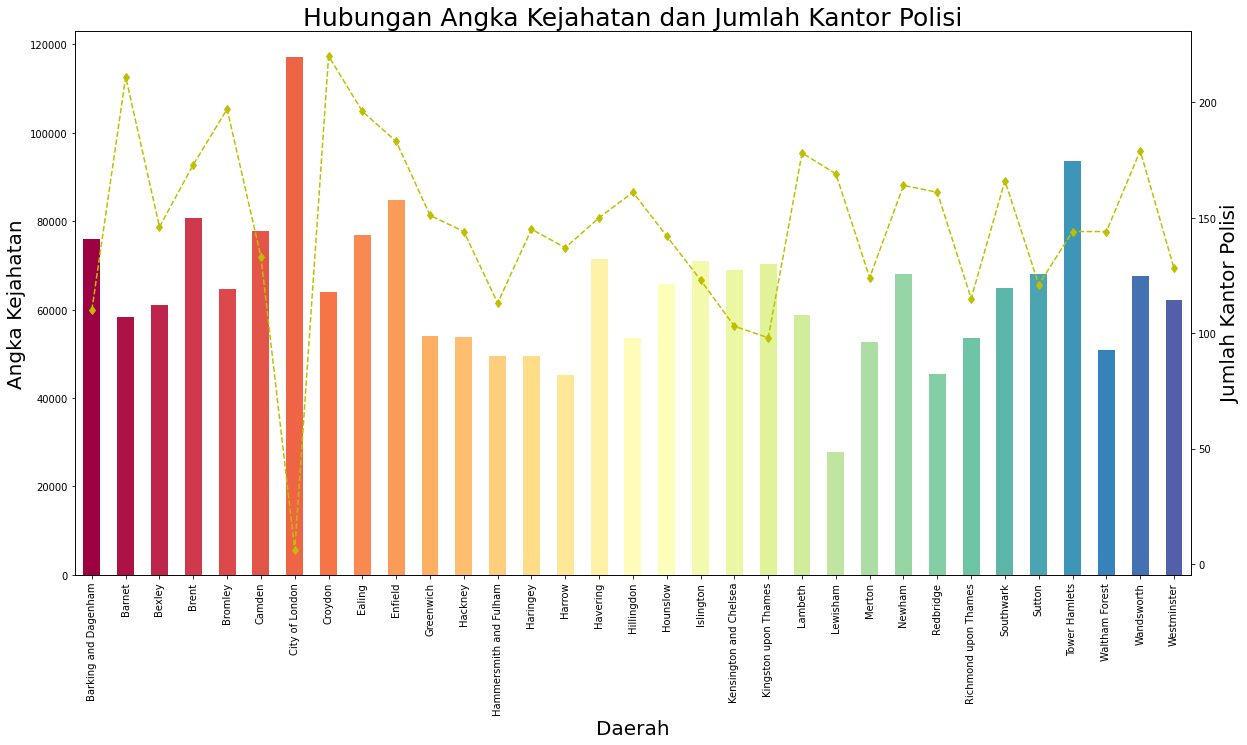

In [34]:
color2= [cmap(i) for i in np.linspace(0, 1, 34)]
fig, ax1 = plt.subplots(figsize=(20, 10))
df_kantor_polisi['Jumlah Kantor'].plot(kind='line', marker='d', secondary_y=True, ls='--', color='y', ax=ax1)
ax= df_kantor_polisi['Angka Kejahatan'].plot(kind='bar', color=color2)
ax.set_ylabel('Angka Kejahatan', fontsize=20)
ax.set_xlabel('Daerah', fontsize=20)
plt.ylabel('Jumlah Kantor Polisi', size=20)
plt.title('Hubungan Angka Kejahatan dan Jumlah Kantor Polisi', size=25)
plt.show()


### kesimpulan
- berdasarkan gambar diatas dapat disimpulkan bahwa jumlah kantor polisi atau kode area sangat berhubungan dengan angka kejahatan
- di City of London memiliki angka kejahatan yang tinggi karena jumlah kantor polisi yang sedikit
- hal ini menimbulkan beberapa pertanyaan:
    - bagaimana kejahatan yang berlangsung di City of London?

# daerah di London

## persiapan

In [35]:
df_kantor_polisi.head()

,Jumlah Kantor,Angka Kejahatan
Daerah,,
Barking and Dagenham,110,75869
Barnet,211,58287
Bexley,146,61137
Brent,173,80763
Bromley,197,64726


In [36]:
angka_kejahatan=df_kantor_polisi['Angka Kejahatan'].sum()

In [57]:
max_words = 500
word_string = ''
for Daerah in df_kantor_polisi.index.values:
    if len(Daerah.split(' ')) == 1:
        repeat_num_times = int(df_kantor_polisi.loc[Daerah, 'Angka Kejahatan']/float(angka_kejahatan)*max_words)
        word_string = word_string + ((Daerah + ' ') * repeat_num_times)

In [59]:
wordcloud = WordCloud(background_color='white').generate(word_string)

### infografis

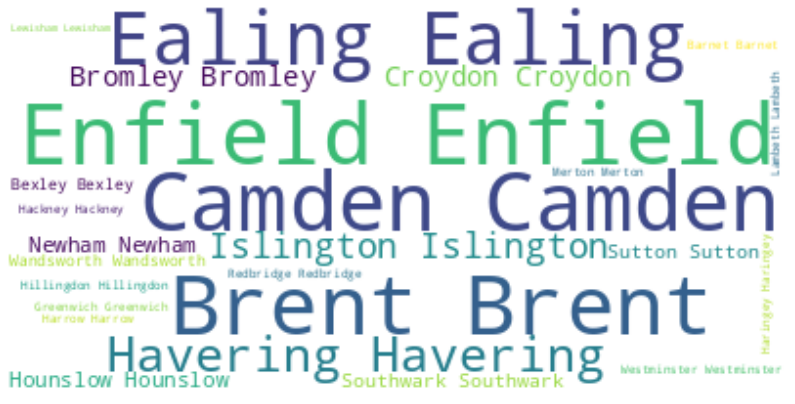

In [60]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

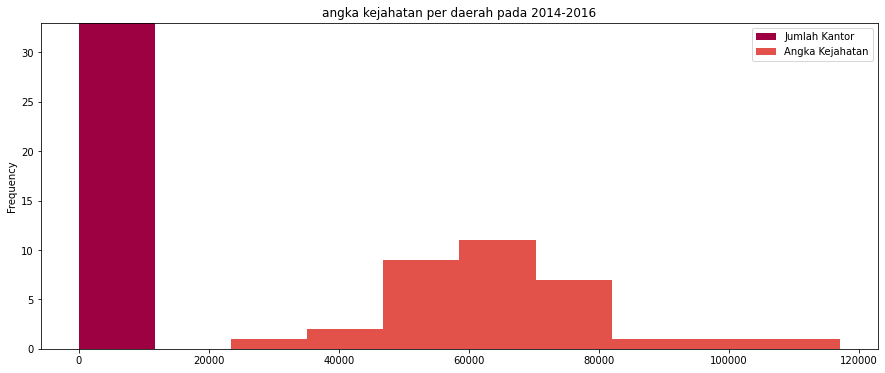

In [51]:
color1= [cmap(i) for i in np.linspace(0, 1, 8)]
df_kantor_polisi.plot(kind='hist',
                                         figsize=(15,6),
                                         stacked=True,
                                         color=color1)
plt.title('angka kejahatan per daerah pada 2014-2016')
plt.show()

kesimpulan
- dari gambar histogram kita tahu, bahwa kontribusi jumlah kantor polisi dari setiap daerah jauh lebih sedikit dari kejahatannya. 

# kejahatan di City of London

## preparasi

In [41]:
df_14.reset_index(inplace=True)
df_14.set_index('borough', inplace=True)
df_city_14=df_14.loc['City of London']
tiap_bulan_14=df_city_14.groupby('month').sum()
tiap_bulan_14.drop(['year'], axis=1, inplace=True)
tiap_bulan_14.reset_index(inplace=True)
tiap_bulan_14

,month,value
0,1,11
1,2,7
2,3,4
3,4,8
4,5,13
5,6,4
6,7,6
7,8,9
8,9,11
9,10,9


In [42]:
df_15.reset_index(inplace=True)
df_15.set_index('borough', inplace=True)
df_city_15=df_15.loc['City of London']
tiap_bulan_15=df_city_15.groupby('month').sum()
tiap_bulan_15.drop(['year'], axis=1, inplace=True)
tiap_bulan_15.reset_index(inplace=True)
tiap_bulan_15

,month,value
0,1,9
1,2,9
2,3,10
3,4,15
4,5,20
5,6,13
6,7,16
7,8,16
8,9,16
9,10,9


In [43]:
df_16.reset_index(inplace=True)
df_16.set_index('borough', inplace=True)
df_city_16=df_16.loc['City of London']
tiap_bulan_16=df_city_16.groupby('month').sum()
tiap_bulan_16.drop(['year'], axis=1, inplace=True)
tiap_bulan_16.reset_index(inplace=True)
tiap_bulan_16

,month,value
0,1,10
1,2,10
2,3,12
3,4,15
4,5,9
5,6,8
6,7,13
7,8,19
8,9,19
9,10,17


In [44]:
df_city_14_16=pd.DataFrame({'month':tiap_bulan_14['month'],
                                                    '2014':tiap_bulan_14['value'], 
                                                    '2015':tiap_bulan_15['value'], 
                                                    '2016':tiap_bulan_16['value']})
df_city_14_16.set_index('month', inplace=True)
df_city_14_16

,2014,2015,2016
month,,,
1,11,9,10
2,7,9,10
3,4,10,12
4,8,15,15
5,13,20,9
6,4,13,8
7,6,16,13
8,9,16,19
9,11,16,19


In [45]:
df_city_14_16['total']=df_city_14_16.sum(axis=1)
df_city_14_16.reset_index(inplace=True)

## infografis

Text(0.5, 1.0, 'angka Kejahatan di city of London tiap bualnnya pada tahun 2014-2016')

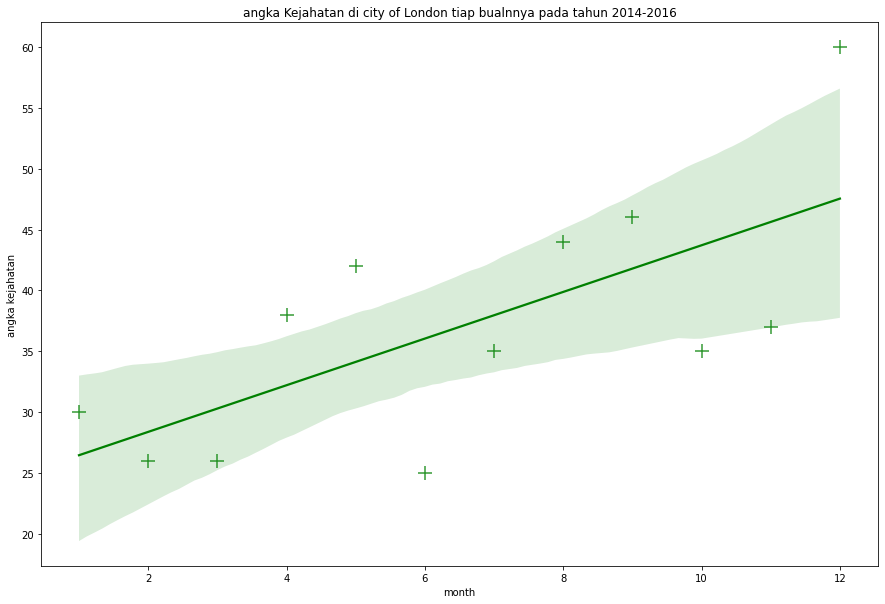

In [46]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='month', y='total', data=df_city_14_16, color='g', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='month', ylabel='angka kejahatan')
ax.set_title('angka Kejahatan di city of London tiap bualnnya pada tahun 2014-2016')

Text(0, 0.5, 'angka kejahatan')

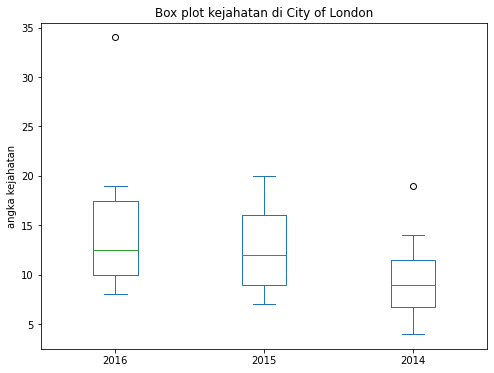

In [47]:
df_city_14_16[{'2014','2015','2016'}].plot(kind='box', figsize=(8, 6))

plt.title('Box plot kejahatan di City of London')
plt.ylabel('angka kejahatan')

### kesimpulan
- tingkat kejahatan pada sepanjang tahun 2014-2016 terus mengalami peningkatan setiap bulannya
- pada tahun 2016 merupakan puncak kejahatan yang terjadi di city of London